In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0-rc2


In [2]:
from IPython.display import clear_output

In [3]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [4]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

In [5]:
cutoff = len(test_images) // 2
validation_images, test_images = test_images[:cutoff], test_images[cutoff:]
validation_labels, test_labels = test_labels[:cutoff], test_labels[cutoff:]

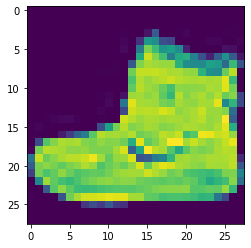

In [6]:
plt.imshow(train_images[0].reshape(28, 28))

In [7]:
classes = np.unique(train_labels)
num_classes = len(classes)

In [8]:
img_rows, img_cols = (28, 28)
train_images = train_images.reshape(-1, img_rows, img_cols, 1)
validation_images = validation_images.reshape(-1, img_rows, img_cols, 1)
test_images = test_images.reshape(-1, img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [9]:
class PlotLosses(keras.callbacks.Callback):
    def __init__(
        self,
        metrics=None,
        validation=True,
    ):
        self.metrics = ["loss"]
        if metrics:
            self.metrics += metrics
        if validation:
            for i in reversed(range(len(self.metrics))):
                self.metrics.insert(i + 1, "val_" + self.metrics[i])
        self.hist_metrics = [list() for metric in self.metrics]
        
    def on_train_begin(self, logs={}):
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(logs)
        for metric, hist_metric in zip(self.metrics, self.hist_metrics):
            hist_metric.append(logs.get(metric))

        clear_output(wait=True)
        
        self.fig = plt.figure(figsize=(15, 7))
        for metric, hist_metric in zip(self.metrics, self.hist_metrics):
            plt.plot(range(len(self.hist_metrics[0])), hist_metric, label=metric)
        plt.legend()
        plt.show()

    def __len__(self):
        return len(self.hist_metrics[0])

In [10]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=input_shape),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(.2),
    keras.layers.Dense(num_classes, activation="softmax"),
])

In [11]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dropout (Dropout)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


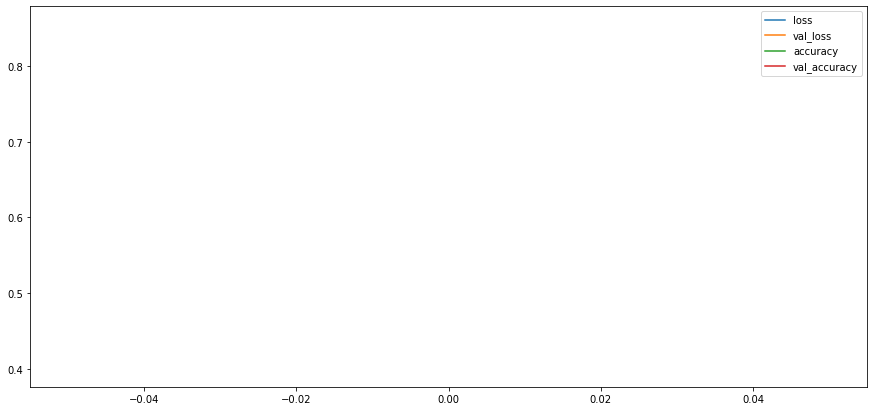

60000/60000 [==============================] - 17s 281us/sample - loss: 0.4750 - accuracy: 0.8326 - val_loss: 0.3996 - val_accuracy: 0.8556


In [13]:
model.fit(
    train_images, train_labels,
    epochs=1,
    batch_size=32,
    validation_data=(validation_images, validation_labels),
    callbacks=[
        keras.callbacks.EarlyStopping(
            patience=3,
            restore_best_weights=True,
        ),
        PlotLosses(["accuracy"]),
    ],
)

In [14]:
model.evaluate(test_images, test_labels)

5000/5000 [==============================] - 1s 104us/sample - loss: 0.4001 - accuracy: 0.8584


[0.40008051009178164, 0.8584]

In [15]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=input_shape),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1280, activation="relu", kernel_initializer="random_uniform", trainable=False),
    keras.layers.Dropout(.2),
    keras.layers.Dense(num_classes, activation="softmax"),
])

In [16]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1280)              6923520   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                12810     
Total params: 6,936,650
Trainable params: 13,130
Non-trainable params: 6,923,520
_______________________________________

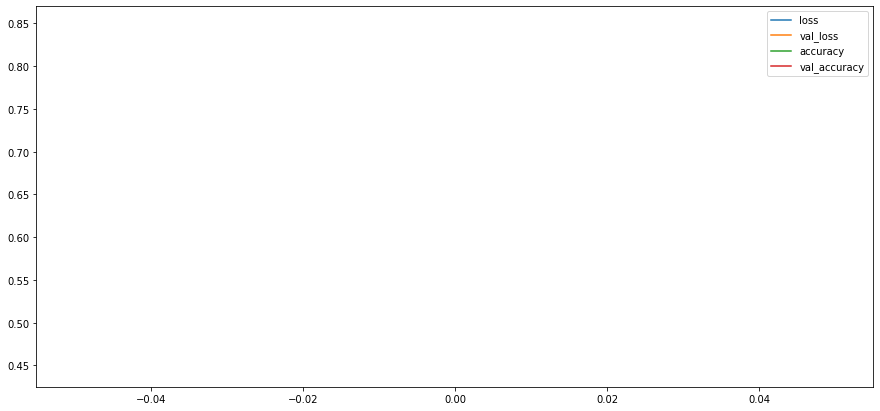

60000/60000 [==============================] - 43s 718us/sample - loss: 0.5669 - accuracy: 0.7994 - val_loss: 0.4451 - val_accuracy: 0.8498


In [18]:
model.fit(
    train_images, train_labels,
    epochs=1,
    batch_size=32,
    validation_data=(validation_images, validation_labels),
    callbacks=[
        keras.callbacks.EarlyStopping(
            patience=3,
            restore_best_weights=True,
        ),
        PlotLosses(["accuracy"]),
    ],
)

In [19]:
model.evaluate(test_images, test_labels)

5000/5000 [==============================] - 1s 279us/sample - loss: 0.4561 - accuracy: 0.8360


[0.4561106882572174, 0.836]

In [20]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=input_shape),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1280, activation="relu", kernel_initializer="random_uniform", trainable=True),
    keras.layers.Dropout(.2),
    keras.layers.Dense(num_classes, activation="softmax"),
])

In [21]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1280)              6923520   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                12810     
Total params: 6,936,650
Trainable params: 6,936,650
Non-trainable params: 0
____________________________________________

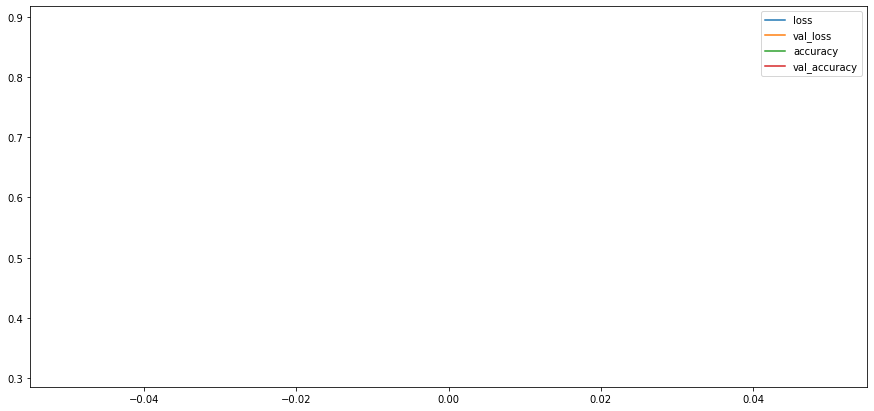

60000/60000 [==============================] - 77s 1ms/sample - loss: 0.3723 - accuracy: 0.8651 - val_loss: 0.3143 - val_accuracy: 0.8888


In [23]:
model.fit(
    train_images, train_labels,
    epochs=1,
    batch_size=32,
    validation_data=(validation_images, validation_labels),
    callbacks=[
        keras.callbacks.EarlyStopping(
            patience=3,
            restore_best_weights=True,
        ),
        PlotLosses(["accuracy"]),
    ],
)

In [24]:
model.evaluate(test_images, test_labels)

5000/5000 [==============================] - 1s 289us/sample - loss: 0.2857 - accuracy: 0.8970


[0.2856820567071438, 0.897]